<a href="https://colab.research.google.com/github/NileshCT/Linear_Regression_Modelling/blob/main/Linear_Regression_Model_using_household_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
#Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",sep=";")

<ipython-input-84-9c7b044435ee>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",sep=";")


In [85]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
733201,8/5/2008,21:25:00,1.348,0.246,242.180,5.800,0.000,0.000,0.0
126688,14/3/2007,16:52:00,0.334,0.134,244.300,1.400,0.000,0.000,0.0
1166153,5/3/2009,13:17:00,1.472,0.052,241.770,6.000,0.000,0.000,18.0
1287298,28/5/2009,16:22:00,0.388,0.194,242.210,1.800,0.000,2.000,1.0
463135,3/11/2007,08:19:00,0.202,0.000,240.760,0.800,0.000,0.000,0.0


In [86]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [87]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [88]:
df.describe(include="all")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,1442,1440,6534,896,5168,377,153,145,NaN
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [91]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [92]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [93]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [94]:
df.shape

(2075259, 9)

In [95]:
df.shape[1]

9

In [96]:
#step 2 cleaning process

In [103]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [98]:
#Dropped unwanted columns ie date and time.
df.drop(["Date","Time"],axis=1,inplace=True)

In [104]:
gk=df.describe(include=object)
gk

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2049280,2049280,2049280,2049280,2049280,2049280
unique,6533,895,5167,376,152,144
top,0.218,0.000,241.180,1.000,0.000,0.000
freq,9491,472786,3519,169406,1840611,1408274


In [106]:
#Replace ? marks with nan values.
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [107]:
df.replace('?', np.nan, inplace=True)

In [118]:
df['Global_active_power']=df['Global_active_power'].replace(np.nan,df['Global_active_power'].median())

In [120]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,9.311171e+00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,9.525778e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


array([[<Axes: title={'center': 'Global_active_power'}>,
        <Axes: title={'center': 'Global_reactive_power'}>,
        <Axes: title={'center': 'Voltage'}>],
       [<Axes: title={'center': 'Global_intensity'}>,
        <Axes: title={'center': 'Sub_metering_1'}>,
        <Axes: title={'center': 'Sub_metering_2'}>],
       [<Axes: title={'center': 'Sub_metering_3'}>,
        <Axes: title={'center': 'energy_consumption'}>, <Axes: >]],
      dtype=object)

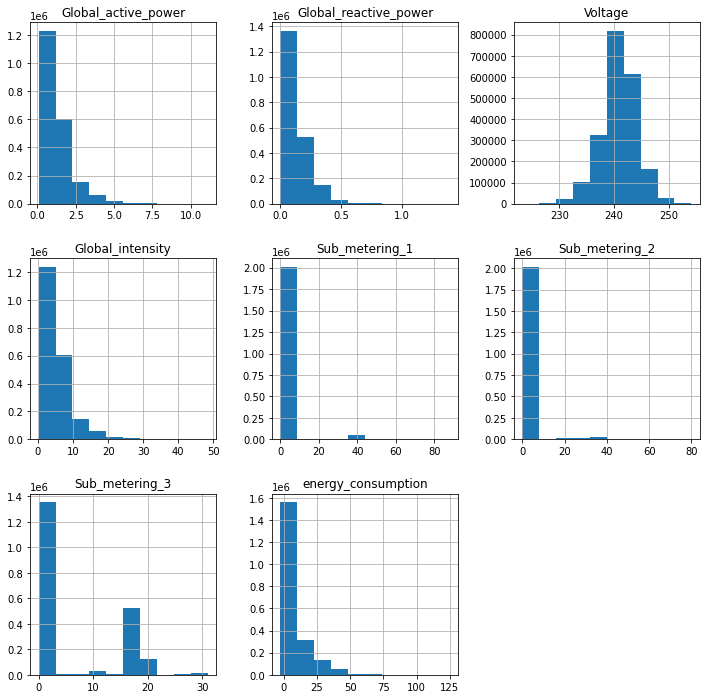

In [122]:
df.hist(figsize=(12,12))


In [126]:
np.median(df['Global_intensity'])

2.6

In [116]:
#we replaced all null values using the median values.
for i in gk:
  df[i]=df[i].replace(np.nan,df[i].median())
  print(df[i])


0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2075259, dtype: float64
0          0.418
1          0.436
2          0.498
3          0.502
4          0.528
           ...  
2075254    0.000
2075255    0.000
2075256    0.000
2075257    0.000
2075258    0.000
Name: Global_reactive_power, Length: 2075259, dtype: float64
0          234.84
1          233.63
2          233.29
3          233.74
4          235.68
            ...  
2075254    240.43
2075255    240.00
2075256    239.82
2075257    239.70
2075258    239.55
Name: Voltage, Length: 2075259, dtype: float64
0          18.4
1          23.0
2          23.0
3          23.0
4          15.8
           ... 
2075254     4.0
2075255     4.0
2075256     3.8
2075257     3.8
2075258     3.8
Name: Global_intensity, Length: 2075259, dtype: float64
0          0.0
1          0.0

In [109]:
df['Sub_metering_3']=df['Sub_metering_3'].replace(np.nan,df['Sub_metering_3'].median())

In [110]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<Axes: >

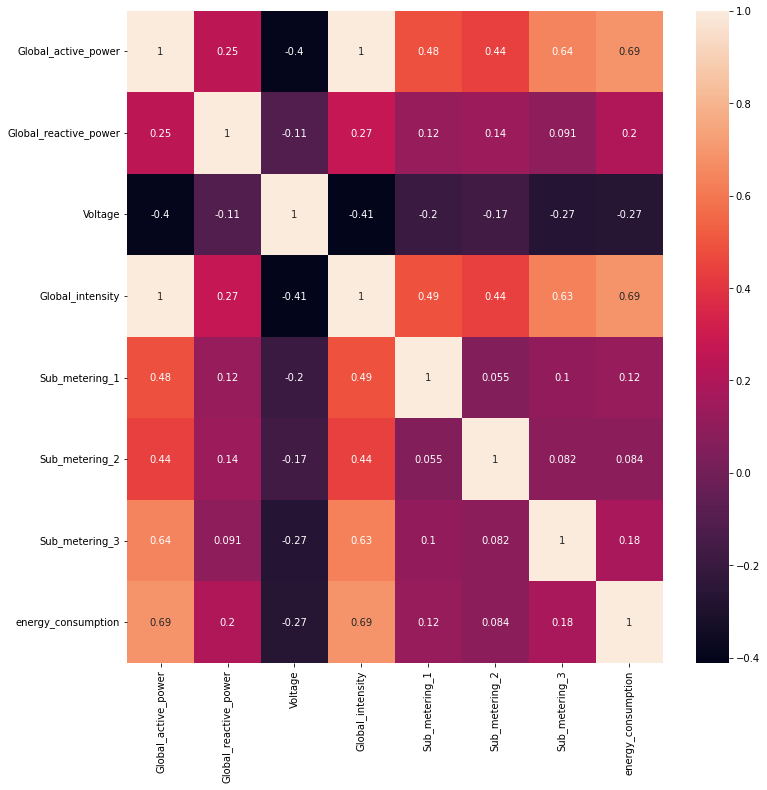

In [141]:
plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 110.8+ MB


In [112]:
#Here we have converted all object dtypes to flat datatypes using this for loop.
for i in gk:
  df[i]=df[i].astype("float")
  print(df[i].dtypes)

float64
float64
float64
float64
float64
float64


In [113]:
#code to convert object to float
df["Global_active_power"]= df["Global_active_power"].astype('float64')

In [114]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [129]:
df['energy_consumption']=(df["Global_active_power"] * 1000/60) - (df["Sub_metering_1"]+df["Sub_metering_2"]+df["Sub_metering_3"])

In [ ]:
# # List to append calculations to
# energy_consumption= []

# # Iterate over dataframe
# for index, row in df.iterrows():
#     # If even, no remainder after division by 2
#     if (index % 2) == 0:
#         # Get relevant data by locating at current index position +1
#         calc = (df.loc[index+1,"Global_active_power"]* 1000/60) - (df.loc[index+1,"Sub_metering_1"]+df.loc[index+1,"Sub_metering_2"]+df.loc[index+1,"Sub_metering_3"])
#     else:
#         # Get relevant data by locating at current index position -1
#         calc = (df.loc[index+1,"Global_active_power"]* 1000/60) - (df.loc[index+1,"Sub_metering_1"]+df.loc[index+1,"Sub_metering_2"]+df.loc[index+1,"Sub_metering_3"])

#     # Append calculation to list
#     energy_consumption.append(calc)

# # Create new column from list
# df["energy_consumption"] = energy_consumption

In [135]:
df["Global_active_power"].count()

2075259

In [171]:
for index,row in df.iterrows():
  if index==3:
    break
print(index,row)

3 Global_active_power        5.388
Global_reactive_power      0.502
Voltage                  233.740
Global_intensity          23.000
Sub_metering_1             0.000
Sub_metering_2             1.000
Sub_metering_3            17.000
energy_consumption        43.100
Name: 3, dtype: float64


Here df is original data frame and df1 where i apply some different code and getting different results from it.

In [162]:
df.iterrows()

<generator object DataFrame.iterrows at 0x7f0a1b8383c0>

In [138]:
print(df["energy_consumption"])

0          15.533333
1          70.566667
2          70.566667
3          43.100000
4          43.100000
             ...    
2075254    15.766667
2075255    15.633333
2075256    15.633333
2075257    15.533333
2075258    15.533333
Name: energy_consumption, Length: 2075259, dtype: float64


In [172]:
df1=df.copy()

In [173]:
df1['energy_consumption']=(df1["Global_active_power"] * 1000/60) - (df1["Sub_metering_1"]+df1["Sub_metering_2"]+df1["Sub_metering_3"])

In [174]:
print(df1["energy_consumption"])

0          52.266667
1          72.333333
2          70.566667
3          71.800000
4          43.100000
             ...    
2075254    15.766667
2075255    15.733333
2075256    15.633333
2075257    15.566667
2075258    15.533333
Name: energy_consumption, Length: 2075259, dtype: float64


In [155]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,9.311171e+00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,9.525778e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


<Axes: >

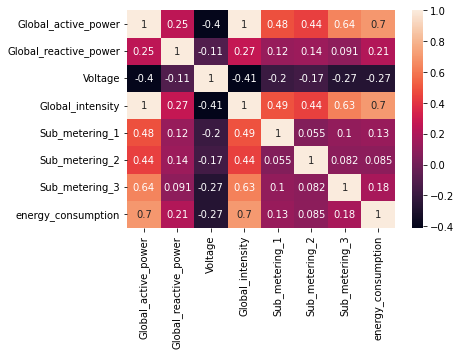

In [158]:
corr=df1.corr()
sns.heatmap(corr,annot=True)